<a href="https://colab.research.google.com/github/DanielAldas/RIIAA5.0_Workshop/blob/main/Building_%26_interpreting_Deep_AmPEP30_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Predicting the antimicrobial activity of short-length peptides**

Notebook by [Dr. Fabien Plisson](https://github.com/plissonf) and [MSc. Daniel Aldas](https://github.com/DanielAldas/)

[Original Paper](https://doi.org/10.1016/j.omtn.2020.05.006)

[Dataset](https://cbbio.online/AxPEP/?action=dataset)

#Downgrade sklearn

In [80]:
! pip uninstall -y scikit-learn

In [81]:
! pip install scikit-learn==0.23.1

In [82]:
import sklearn
sklearn.__version__

'0.23.1'

# **Install Conda on Google Colab**

In [83]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

# **Download and Install Pfeature (variables)**

In [84]:
! wget https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip

In [85]:
! unzip Pfeature.zip

In [86]:
%cd Pfeature

In [87]:
! python setup.py install

#Install modlAMP


In [88]:
! pip install modlamp


#Biopython

In [89]:
! pip install biopython


# **Install CD-HIT**

In [90]:
! conda install -c bioconda cd-hit -y

# **Load peptide dataset**

In [91]:
! wget https://raw.githubusercontent.com/plissonf/RIIAA5.0_Workshop/main/train_set/train_po.fasta

In [92]:
! wget https://raw.githubusercontent.com/plissonf/RIIAA5.0_Workshop/main/train_set/train_ne.fasta

In [93]:
! cat train_po.fasta

In [94]:
! cat train_ne.fasta

# **Remove redundant sequences using CD-HIT**

In [95]:
! cd-hit -i train_po.fasta -o train_po_cdhit.txt -c 0.99

In [96]:
! cd-hit -i train_ne.fasta -o train_ne_cdhit.txt -c 0.99

In [97]:
! ls -l

In [98]:
! grep ">" train_po_cdhit.txt | wc -l

In [99]:
! grep ">" train_po.fasta | wc -l

In [100]:
! grep ">" train_ne.fasta | wc -l

In [101]:
! grep ">" train_ne_cdhit.txt | wc -l

# **Calculate features using the Pfeature library**

Feature classes provided by Pfeature is summarized in the tables below.

**Composition Based Features**

Feature claass | Description | Function
---|---|---
AAC | Amino acid composition | aac_wp
DPC | Dipeptide composition | dpc_wp
TPC | Tripeptide composition | tpc_wp
ABC | Atom and bond composition | atc_wp, btc_wp
PCP | Physico-chemical properties | pcp_wp
AAI | Amino acid index composition | aai_wp
RRI | Repetitive Residue Information | rri_wp
DDR | Distance distribution of residues |ddr_wp
PRI | Physico-chemical properties repeat composition | pri_wp
SEP | Shannon entropy | sep_wp
SER | Shannon entropy of residue level | ser_wp
SPC | Shannon entropy of physicochemical property | spc_wp
ACR | Autocorrelation | acr_wp
CTC | Conjoint Triad Calculation | ctc_wp
CTD | Composition enhanced transition distribution | ctd_wp
PAAC | Pseudo amino acid composition | paac_wp
APAAC | Amphiphilic pseudo amino acid composition | apaac_wp
QSO | Quasi sequence order | qos_wp
SOC | Sequence order coupling | soc_wp

[Pfeature Manual](https://webs.iiitd.edu.in/raghava/pfeature/Pfeature_Manual.pdf)

### **Define functions for calculating the different features**

In [102]:
import pandas as pd
import numpy as np

In [103]:
# Amino acid composition (AAC)

from Pfeature.pfeature import aac_wp

def aac(input):
  a = input.rstrip('txt')
  output = a + 'aac.csv'
  df_out = aac_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in

feature = aac('train_po_cdhit.txt')
feature

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.00,9.09
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.00,0.00
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,10.00,0.00,3.33,3.33,6.67,20.00,0.00,3.33,13.33,13.33,3.33,0.00,0.00,3.33,0.00,6.67,3.33,10.00,0.00,0.00
1333,6.67,3.33,0.00,0.00,3.33,20.00,6.67,3.33,3.33,6.67,0.00,6.67,0.00,3.33,6.67,10.00,3.33,13.33,3.33,0.00
1334,13.33,0.00,0.00,3.33,0.00,3.33,13.33,0.00,0.00,10.00,0.00,0.00,16.67,6.67,16.67,6.67,3.33,0.00,0.00,6.67
1335,6.67,0.00,6.67,6.67,0.00,6.67,3.33,6.67,6.67,26.67,0.00,3.33,0.00,10.00,10.00,3.33,3.33,0.00,0.00,0.00


In [104]:
# Dipeptide composition (DPC)

from Pfeature.pfeature import dpc_wp

def dpc(input):
  a = input.rstrip('txt')
  output = a + 'dpc.csv'
  df_out = dpc_wp(input, output, 1)
  df_in = pd.read_csv(output)
  return df_in

feature = dpc('train_po_cdhit.txt')
feature

,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,...,DPC1_YM,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YW,DPC1_YY
0,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,0.00,0.00,3.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1333,0.00,0.00,0.00,0.00,0.00,3.45,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1334,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.90,...,0.00,0.00,3.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1335,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.45,3.45,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [105]:
# Physico-Chemical Properties Composition (PCP)

from Pfeature.pfeature import pcp_wp

def pcp(input):
  a = input.rstrip('txt')
  output = a + 'pcp.csv'
  df_out = pcp_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in

feature = pcp('train_po_cdhit.txt')
feature

,PCP_PC,PCP_NC,PCP_NE,PCP_PO,PCP_NP,PCP_AL,PCP_CY,PCP_AR,PCP_AC,PCP_BS,...,PCP_SA_EX,PCP_SA_IN,PCP_TN,PCP_SM,PCP_LR,PCP_Z1,PCP_Z2,PCP_Z3,PCP_Z4,PCP_Z5
0,0.00,0.09,0.91,0.09,0.73,0.64,0.09,0.18,0.09,0.00,...,0.27,0.18,0.36,0.82,0.18,-0.34,-0.83,0.49,-0.48,0.23
1,0.00,0.09,0.91,0.91,0.00,0.00,0.00,0.00,0.09,0.00,...,0.09,0.36,0.73,0.91,0.09,1.31,-1.48,2.02,-0.70,-1.42
2,0.09,0.27,0.64,0.00,0.64,0.46,0.18,0.09,0.27,0.09,...,0.46,0.36,0.09,0.46,0.55,-0.23,-0.21,0.41,-0.29,0.29
3,0.09,0.18,0.73,0.00,0.64,0.46,0.18,0.09,0.18,0.09,...,0.46,0.36,0.09,0.46,0.55,-0.32,-0.15,0.33,-0.17,0.07
4,0.00,0.27,0.73,0.00,0.64,0.36,0.18,0.18,0.27,0.00,...,0.55,0.27,0.09,0.46,0.55,-0.33,0.17,0.72,-0.62,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,0.13,0.07,0.80,0.13,0.67,0.57,0.00,0.07,0.07,0.13,...,0.23,0.13,0.37,0.53,0.47,-0.12,-1.39,-0.47,-0.46,0.21
1333,0.17,0.00,0.83,0.20,0.57,0.50,0.00,0.07,0.00,0.17,...,0.13,0.20,0.40,0.63,0.37,0.41,-1.05,-0.27,-0.09,-0.12
1334,0.30,0.03,0.67,0.23,0.43,0.43,0.17,0.07,0.03,0.30,...,0.27,0.47,0.23,0.43,0.57,0.55,0.21,-0.33,0.52,0.53
1335,0.20,0.13,0.67,0.17,0.47,0.47,0.00,0.00,0.13,0.20,...,0.33,0.10,0.17,0.30,0.70,0.19,-0.44,-0.94,-0.52,0.36


### **Calculate feature for both positive and negative classes + combines the two classes + merge with class labels**

In [106]:
pos = 'train_po_cdhit.txt'
neg = 'train_ne_cdhit.txt'

def feature_calc(po, ne, feature_name):
  # Calculate feature
  po_feature = feature_name(po)
  ne_feature = feature_name(ne)
  # Create class labels
  po_class = pd.Series(['positive' for i in range(len(po_feature))])
  ne_class = pd.Series(['negative' for i in range(len(ne_feature))])
  # Combine po and ne
  po_ne_class = pd.concat([po_class, ne_class], axis=0)
  po_ne_class.name = 'class'
  po_ne_feature = pd.concat([po_feature, ne_feature], axis=0)
  # Combine feature and class
  df = pd.concat([po_ne_feature, po_ne_class], axis=1)
  return df

feature_aac = feature_calc(pos, neg, aac) # AAC
feature_dpc = feature_calc(pos, neg, dpc) # DPC
feature_pcp = feature_calc(pos, neg, pcp) # PCP 

In [107]:
feature_aac

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y,class
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,...,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.00,9.09,positive
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.00,0.00,positive
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00,positive
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00,positive
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,...,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.00,0.00,negative
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,...,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.00,0.00,negative
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,...,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.00,6.67,negative
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,...,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.00,3.33,negative


In [108]:
feature_aac.columns

Index(['AAC_A', 'AAC_C', 'AAC_D', 'AAC_E', 'AAC_F', 'AAC_G', 'AAC_H', 'AAC_I',
       'AAC_K', 'AAC_L', 'AAC_M', 'AAC_N', 'AAC_P', 'AAC_Q', 'AAC_R', 'AAC_S',
       'AAC_T', 'AAC_V', 'AAC_W', 'AAC_Y', 'class'],
      dtype='object')

# **Data pre-processing**

In [109]:
feature_aac

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y,class
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,...,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.00,9.09,positive
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.00,0.00,positive
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00,positive
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00,positive
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,...,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.00,0.00,negative
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,...,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.00,0.00,negative
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,...,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.00,6.67,negative
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,...,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.00,3.33,negative


In [110]:
# Assigns the features to X and class label to Y
X = feature_aac.drop('class', axis=1)
y = feature_aac['class'].copy()

In [111]:
# Encoding the Y class label
y = y.map({"positive": 1, "negative": 0})  

In [112]:
X.shape

(2759, 20)

In [113]:
# Feature selection (Variance threshold)
from sklearn.feature_selection import VarianceThreshold

fs = VarianceThreshold(threshold=0.1)
fs.fit_transform(X)
#X2.shape
X2 = X.loc[:, fs.get_support()]
X2

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.00,9.09
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.00,0.00
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,3.33,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.00,0.00
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,3.33,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.00,0.00
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,0.00,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.00,6.67
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,3.33,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.00,3.33


In [114]:
# Data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state =42, stratify=y)

---

# **Quickly compare >30 ML algorithms**

In [115]:
! pip install lazypredict

In [116]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

# Load dataset
X = feature_aac.drop('class', axis=1)
y = feature_aac['class'].copy()

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:05<00:00,  5.43it/s]


In [117]:
# Prints the model performance (Training set)
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
NuSVC,0.75,0.76,None,0.75,0.52,0.39
SVC,0.75,0.75,None,0.75,0.50,0.34
XGBClassifier,0.73,0.73,None,0.73,0.47,0.20
KNeighborsClassifier,0.73,0.73,None,0.73,0.46,0.10
QuadraticDiscriminantAnalysis,0.72,0.72,None,0.72,0.44,0.04
AdaBoostClassifier,0.71,0.71,None,0.71,0.43,0.36
CalibratedClassifierCV,0.71,0.71,None,0.71,0.42,0.85
LogisticRegression,0.71,0.71,None,0.71,0.42,0.05
LGBMClassifier,0.71,0.71,None,0.71,0.42,0.17


[(0.0, 1.0)]

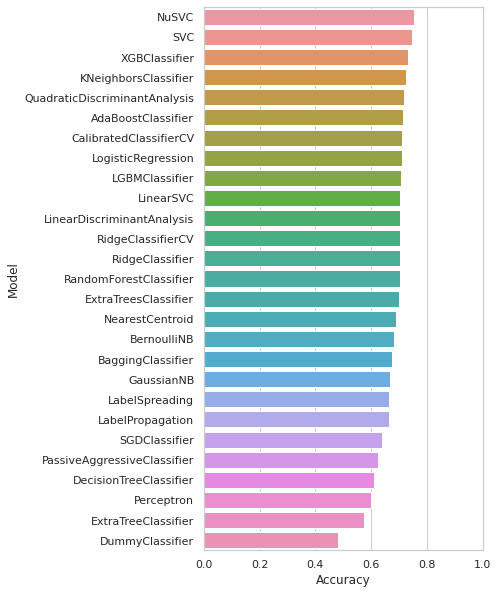

In [118]:
# Plot of Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="Accuracy", data=models)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

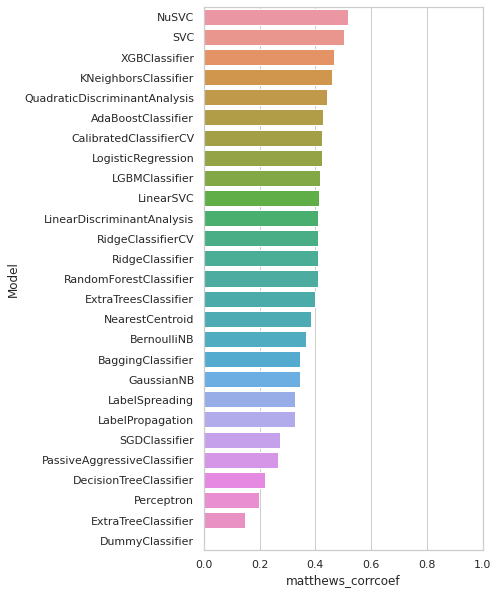

In [119]:
# Plot of MCC
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="matthews_corrcoef", data=models)
ax.set(xlim=(0, 1))

---

# **Nu-Support Vector Classification.**

In [120]:
# Build random forest model

from sklearn.svm import NuSVC


clf = NuSVC(gamma='scale')
clf.fit(X_train, y_train)

NuSVC()

### **Apply the model to make predictions**

In [121]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

### **Model performance**

In [122]:
feature_aac['class']

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
1417    negative
1418    negative
1419    negative
1420    negative
1421    negative
Name: class, Length: 2759, dtype: object

In [123]:
# Simplest and quickest way to obtain the model performance (Accuracy)
clf.score(X_test,y_test)

0.7663043478260869

In [124]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.7663043478260869

In [125]:
# Matthew Correlation Coefficient
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_test_pred)

0.5425510116072906

In [126]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[197,  88],
       [ 41, 226]])

In [127]:
# Classification report
from sklearn.metrics import classification_report

model_report = classification_report(y_train, y_train_pred, target_names=['positive','negative'])

f = open('model_report.txt','w')
f.writelines(model_report) 
f.close()

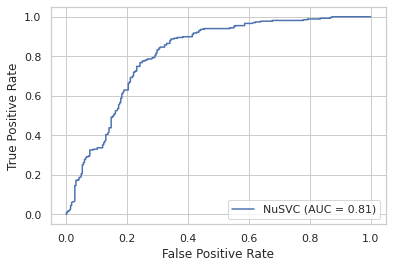

In [128]:
# ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf, X_test, y_test)  
plt.show()

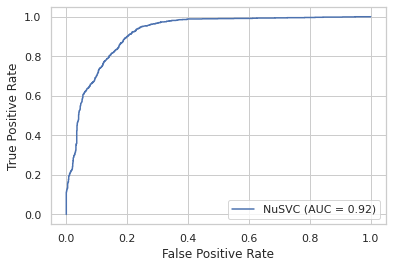

In [129]:
plot_roc_curve(clf, X_train, y_train)  
plt.show()

### **Feature importance**

In [130]:
# Display Dataframe of the dataset after feature selection (variance threshold)
X2

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.00,9.09
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.00,0.00
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,3.33,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.00,0.00
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,3.33,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.00,0.00
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,0.00,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.00,6.67
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,3.33,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.00,3.33


In [131]:
# # Retrieve feature importance from the RF model
# importance = pd.Series(clf.feature_importances_, name = 'Gini')

# # Retrieve feature names
# feature_names = pd.Series(X2.columns, name = 'Feature')

In [132]:
# # Combine feature names and Gini values into a Dataframe
# df = pd.concat([feature_names, importance], axis=1, names=['Feature', 'Gini'])
# df

In [133]:
# # Plot of feature importance
# import matplotlib.pyplot as plt
# import seaborn as sns

# df_sorted = df.sort_values('Gini', ascending=False)[:20] # Sort by Gini in descending order; Showing only the top 20 results

# plt.figure(figsize=(5, 10))
# sns.set_theme(style="whitegrid")
# ax = sns.barplot(x = 'Gini', y = 'Feature', data = df_sorted)
# plt.xlabel("Feature Importance")

#Dipeptide features

In [206]:
# Assigns the features to X and class label to Y
X = feature_dpc.drop('class', axis=1)
y = feature_dpc['class'].copy()

In [207]:
# Encoding the Y class label
y = y.map({"positive": 1, "negative": 0})  

In [208]:
X.shape

(2759, 400)

In [209]:
# Feature selection (Variance threshold)
from sklearn.feature_selection import VarianceThreshold

fs = VarianceThreshold(threshold=0.1)
fs.fit_transform(X)
#X2.shape
X2 = X.loc[:, fs.get_support()]
X2

,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,...,DPC1_YL,DPC1_YM,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YY
0,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,6.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.45,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1418,0.00,0.00,0.00,0.00,0.00,3.45,0.00,0.00,3.45,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1419,0.00,0.00,0.00,0.00,0.00,3.45,0.00,0.00,0.00,3.45,...,0.00,0.00,3.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1420,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,3.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [210]:
# Data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state =42, stratify=y)

In [211]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

# Load dataset
X = feature_aac.drop('class', axis=1)
y = feature_aac['class'].copy()

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:05<00:00,  5.61it/s]


In [212]:
# Prints the model performance (Training set)
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
NuSVC,0.75,0.76,None,0.75,0.52,0.40
SVC,0.75,0.75,None,0.75,0.50,0.33
XGBClassifier,0.73,0.73,None,0.73,0.47,0.20
KNeighborsClassifier,0.73,0.73,None,0.73,0.46,0.09
QuadraticDiscriminantAnalysis,0.72,0.72,None,0.72,0.44,0.04
AdaBoostClassifier,0.71,0.71,None,0.71,0.43,0.31
CalibratedClassifierCV,0.71,0.71,None,0.71,0.42,0.80
LogisticRegression,0.71,0.71,None,0.71,0.42,0.04
LGBMClassifier,0.71,0.71,None,0.71,0.42,0.17


[(0.0, 1.0)]

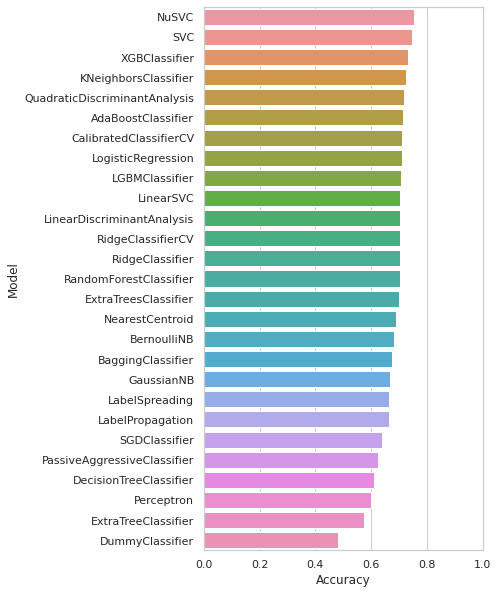

In [213]:
# Plot of Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="Accuracy", data=models)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

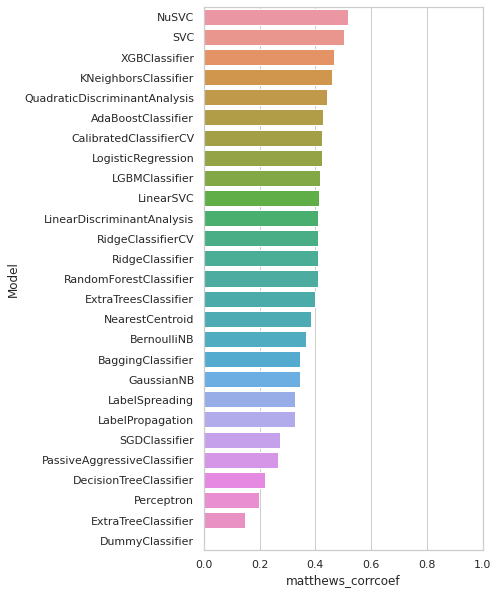

In [214]:
# Plot of MCC
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="matthews_corrcoef", data=models)
ax.set(xlim=(0, 1))

#NuSVC

In [215]:
# Build random forest model

from sklearn.svm import NuSVC


clf = NuSVC(gamma='scale')
clf.fit(X_train, y_train)

NuSVC()

In [216]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [217]:
feature_aac['class']

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
1417    negative
1418    negative
1419    negative
1420    negative
1421    negative
Name: class, Length: 2759, dtype: object

In [218]:
# Simplest and quickest way to obtain the model performance (Accuracy)
clf.score(X_test,y_test)

0.7663043478260869

In [219]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.7663043478260869

In [220]:
# Matthew Correlation Coefficient
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_test_pred)

0.5425510116072906

In [221]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[197,  88],
       [ 41, 226]])

In [222]:
# Classification report
from sklearn.metrics import classification_report

model_report = classification_report(y_train, y_train_pred, target_names=['positive','negative'])

f = open('model_report.txt','w')
f.writelines(model_report) 
f.close()

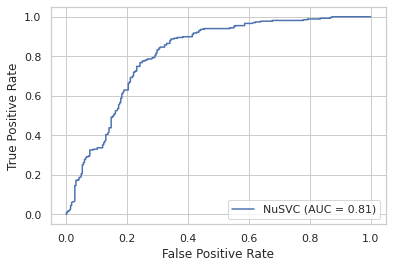

In [223]:
# ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf, X_test, y_test)  
plt.show()

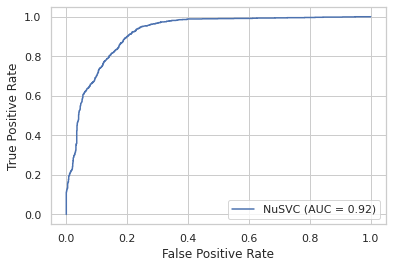

In [224]:
plot_roc_curve(clf, X_train, y_train)  
plt.show()

#PCP features

In [225]:
# Assigns the features to X and class label to Y
X_raw = feature_pcp.drop('class', axis=1)
y = feature_pcp['class'].copy()

In [226]:
# Encoding the Y class label
y = y.map({"positive": 1, "negative": 0})  

In [227]:
X.shape

(2759, 20)

In [228]:
# Feature selection (Variance threshold)
from sklearn.feature_selection import VarianceThreshold

fs = VarianceThreshold(threshold=0.1)
fs.fit_transform(X)
#X2.shape
X2 = X.loc[:, fs.get_support()]
X2

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.00,9.09
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.00,0.00
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,3.33,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.00,0.00
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,3.33,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.00,0.00
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,0.00,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.00,6.67
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,3.33,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.00,3.33


In [229]:
# Data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state =42, stratify=y)

In [230]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

# Load dataset
X = feature_aac.drop('class', axis=1)
y = feature_aac['class'].copy()

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:05<00:00,  5.57it/s]


In [231]:
# Prints the model performance (Training set)
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
NuSVC,0.75,0.76,None,0.75,0.52,0.40
SVC,0.75,0.75,None,0.75,0.50,0.34
XGBClassifier,0.73,0.73,None,0.73,0.47,0.20
KNeighborsClassifier,0.73,0.73,None,0.73,0.46,0.09
QuadraticDiscriminantAnalysis,0.72,0.72,None,0.72,0.44,0.04
AdaBoostClassifier,0.71,0.71,None,0.71,0.43,0.35
CalibratedClassifierCV,0.71,0.71,None,0.71,0.42,0.80
LogisticRegression,0.71,0.71,None,0.71,0.42,0.05
LGBMClassifier,0.71,0.71,None,0.71,0.42,0.17


[(0.0, 1.0)]

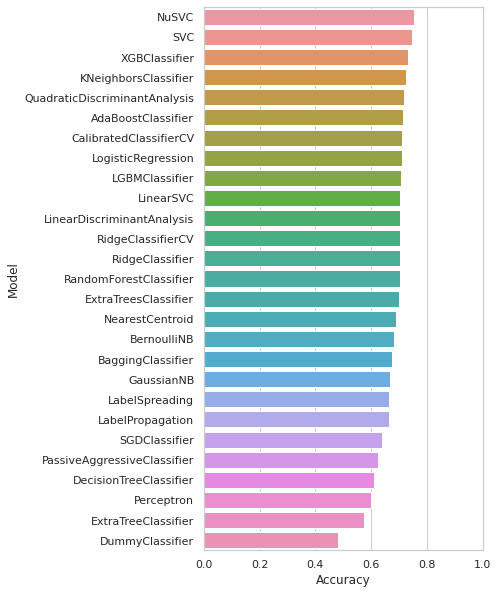

In [232]:
# Plot of Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="Accuracy", data=models)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

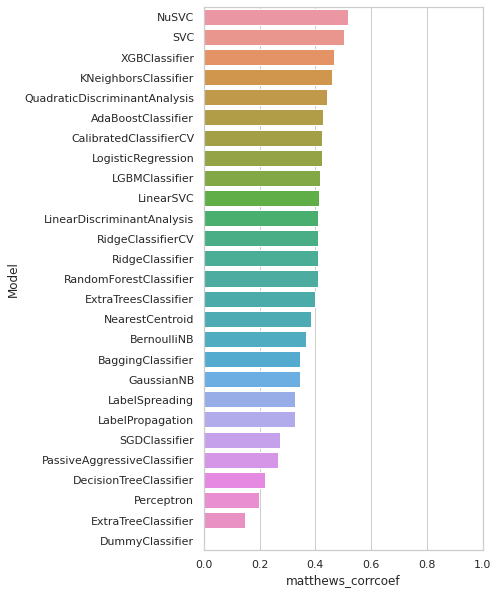

In [233]:
# Plot of MCC
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="matthews_corrcoef", data=models)
ax.set(xlim=(0, 1))

#NuSVC

In [234]:
# Build random forest model

from sklearn.svm import NuSVC


clf = NuSVC(gamma='scale')
clf.fit(X_train, y_train)

NuSVC()

In [235]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [236]:
feature_aac['class']

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
1417    negative
1418    negative
1419    negative
1420    negative
1421    negative
Name: class, Length: 2759, dtype: object

In [237]:
# Simplest and quickest way to obtain the model performance (Accuracy)
clf.score(X_test,y_test)

0.7663043478260869

In [238]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.7663043478260869

In [239]:
# Matthew Correlation Coefficient
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_test_pred)

0.5425510116072906

In [240]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[197,  88],
       [ 41, 226]])

In [241]:
# Classification report
from sklearn.metrics import classification_report

model_report = classification_report(y_train, y_train_pred, target_names=['positive','negative'])

f = open('model_report.txt','w')
f.writelines(model_report) 
f.close()

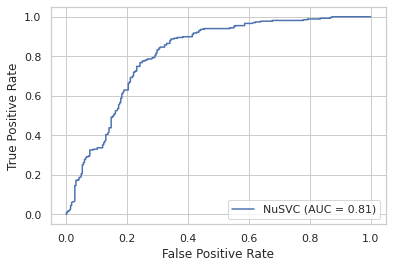

In [242]:
# ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf, X_test, y_test)  
plt.show()

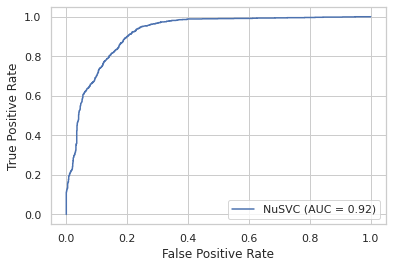

In [243]:
plot_roc_curve(clf, X_train, y_train)  
plt.show()

#ModlAMP features

In [244]:
from modlamp.descriptors import PeptideDescriptor, GlobalDescriptor

In [245]:
import sys
from Bio import SeqIO

In [246]:
def fasta_to_dataframe(file):
    """This function extracts identifier, sequence and sequence lenght from a fasta file and create a pandas DataFrame using this information"""

    with open(file) as fasta_file:
        identifiers = []
        seqs = []
        lenghts = []
        for seq_record in SeqIO.parse(fasta_file, 'fasta'): 
            identifiers.append(seq_record.id)
            seqs.append(str(seq_record.seq))
        
        d = {'id':identifiers, 'sequence':seqs}
        df = pd.DataFrame(data=d)
    return df

In [247]:
pos_df = fasta_to_dataframe(pos)
neg_df = fasta_to_dataframe(neg)

In [248]:
pos_seqs = pos_df.sequence.tolist()
neg_seqs = neg_df.sequence.tolist()

In [249]:
def molecular_descriptors(df='', sec=''):
  # Net charge
  desc=GlobalDescriptor(sec)
  desc.calculate_charge()
  charge=desc.descriptor
  df["Charge"]=charge
  # Isoelectric point (pH = 7)
  desc=GlobalDescriptor(sec)
  desc.isoelectric_point()
  isoelectric=desc.descriptor
  df["Isoelectric_point"]=isoelectric  
  # Aomaticity
  desc=GlobalDescriptor(sec)
  desc.aromaticity()
  aroma=desc.descriptor
  df["Aromaticity"]=aroma
  # Molecular weight
  desc=GlobalDescriptor(sec)
  desc.calculate_MW()
  MW=desc.descriptor
  df["Molecular_weight"]=MW
  # Aliphatic index
  desc=GlobalDescriptor(sec)
  desc.aliphatic_index()
  ali=desc.descriptor
  df["Aliphatic_index"]=ali
  # Hydrophobic ratio
  desc=GlobalDescriptor(sec)
  desc.hydrophobic_ratio()
  hidro=desc.descriptor
  df["Hydrophobic_ratio"]=hidro
  # AASI
  aasi=PeptideDescriptor(sec,"AASI")
  aasi.calculate_global()
  desc_aasi=aasi.descriptor
  df["AASI"]=desc_aasi
  # ABHPRK (modlabs inhouse physicochemical feature scale (Acidic, Basic, Hydrophobic, Polar, aRomatic, Kink-inducer)
  abh=PeptideDescriptor(sec,"ABHPRK")
  abh.calculate_global()
  desc_abh=abh.descriptor
  df["ABHPRK"]=desc_abh
  # Argos hydrophobicity amino acid scale
  argos=PeptideDescriptor(sec,"argos")
  argos.calculate_global()
  desc_argos=argos.descriptor
  df["Argos_hidrophobicity"]=desc_argos
  # Bulkiness
  bulk=PeptideDescriptor(sec,"bulkiness")
  bulk.calculate_global()
  desc_bulk=bulk.descriptor
  df["Bulkiness"]=desc_bulk
  # Charge pH 7
  char7=PeptideDescriptor(sec,"charge_phys")
  char7.calculate_global()
  desc_char7=char7.descriptor
  df["Charge_pH7"]=desc_char7
  #Ejemplo de calculo de un descriptor global de modlamp (Charge acid)
  chara=PeptideDescriptor(sec,"charge_acid")
  chara.calculate_global()
  desc_chara=chara.descriptor
  df["Charge_acid"]=desc_chara
  # Eisenberg_hydrophobicity
  eisen=PeptideDescriptor(sec,"eisenberg")
  eisen.calculate_global()
  desc_eisen=eisen.descriptor
  df["Eisenberg"]=desc_eisen
  # Energies of insertion)
  ez=PeptideDescriptor(sec,"Ez")
  ez.calculate_global()
  desc_ez=ez.descriptor
  df["Ez"]=desc_ez
  # Flexibility
  flex=PeptideDescriptor(sec,"flexibility")
  flex.calculate_global()
  desc_flex=flex.descriptor
  df["Flexibility"]=desc_flex
  # Amino acid side chain composition, polarity and molecular volume
  gran=PeptideDescriptor(sec,"grantham")
  gran.calculate_global()
  desc_gran=gran.descriptor
  df["Grantham"]=desc_gran
  # GRAVY hydrophobicity
  gravy=PeptideDescriptor(sec,"gravy")
  gravy.calculate_global()
  desc_gravy=gravy.descriptor
  df["Gravy"]=desc_gravy
  # Hopp-woods hydrophobicity
  hw=PeptideDescriptor(sec,"hopp-woods")
  hw.calculate_global()
  desc_hw=hw.descriptor
  df["Hopp_Woods"]=desc_hw
  # Isotropic Surface Area and Electronic Charge Index
  isaeci=PeptideDescriptor(sec,"ISAECI")
  isaeci.calculate_global()
  desc_isaeci=isaeci.descriptor
  df["ISAECI"]=desc_isaeci
  # Janin Hydrophobicity
  jan=PeptideDescriptor(sec,"janin")
  jan.calculate_global()
  desc_jan=jan.descriptor
  df["Janin_Hydrophobicity"]=desc_jan
  # kytedoolittle Hydrophobicity
  kd=PeptideDescriptor(sec,"kytedoolittle")
  kd.calculate_global()
  desc_kd=kd.descriptor
  df["Kytedoolittle_Hydrophobicity"]=desc_kd
  # topological shape and size MSS
  mss=PeptideDescriptor(sec,"MSS")
  mss.calculate_global()
  desc_mss=mss.descriptor
  df["MSS"]=desc_mss
  # PCA of the molecular surface
  msw=PeptideDescriptor(sec,"MSW")
  msw.calculate_global()
  desc_msw=msw.descriptor
  df["MSW"]=desc_msw
  # Pharmacophoric feature scale
  pA=PeptideDescriptor(sec,"pepArc")
  pA.calculate_global()
  desc_pA=pA.descriptor
  df["pepArc"]=desc_pA
  # Pharmacophoric feature based PEPCATS
  pc=PeptideDescriptor(sec,"pepcats")
  pc.calculate_global()
  desc_pc=pc.descriptor
  df["pepcats"]=desc_pc
  # Polarity
  pol=PeptideDescriptor(sec,"polarity")
  pol.calculate_global()
  desc_pol=pol.descriptor
  df["Polarity"]=desc_pol
  # PPCALI
  pcal=PeptideDescriptor(sec,"PPCALI")
  pcal.calculate_global()
  desc_pcal=pcal.descriptor
  df["PPCALI"]=desc_pcal
  # Refractivity
  ref=PeptideDescriptor(sec,"refractivity")
  ref.calculate_global()
  desc_ref=ref.descriptor
  df["Refractivity"]=desc_ref
  # t_scale
  tscale=PeptideDescriptor(sec,"t_scale")
  tscale.calculate_global()
  desc_tscale=tscale.descriptor
  df["t_scale"]=desc_tscale
  # Amino acid transmembrane propensity
  TM=PeptideDescriptor(sec,"TM_tend")
  TM.calculate_global()
  desc_TM=TM.descriptor
  df["Transmembrane_propensity"]=desc_TM
  # Three dimensional Z-scale
  z3=PeptideDescriptor(sec,"z3")
  z3.calculate_global()
  desc_z3=z3.descriptor
  df["3D_z-scale"]=desc_z3
  # Five dimensional Z-scale
  z5=PeptideDescriptor(sec,"z5")
  z5.calculate_global()
  desc_z5=z5.descriptor
  df["5D_z-scale"]=desc_z5
  return df

In [250]:
pepdesc_pos = molecular_descriptors(df = pos_df, sec=pos_seqs)

In [251]:
pepdesc_pos

,id,sequence,Charge,Isoelectric_point,Aromaticity,Molecular_weight,Aliphatic_index,Hydrophobic_ratio,AASI,ABHPRK,...,MSW,pepArc,pepcats,Polarity,PPCALI,Refractivity,t_scale,Transmembrane_propensity,3D_z-scale,5D_z-scale
0,amp5_30_85,AVPDVAFNAYG,-1.00,2.93,0.18,1123.22,80.00,0.55,2.03,0.91,...,-0.55,1.00,1.45,0.39,0.64,0.29,-11.82,0.00,-0.75,-0.64
1,amp5_30_86,CTTCECCCSCS,-1.41,3.15,0.00,1142.35,0.00,0.55,2.01,0.55,...,-0.71,1.09,2.55,0.30,-2.23,0.57,-7.02,-0.58,2.12,-0.26
2,amp5_30_87,EPHPDEFVGLM,-2.90,3.70,0.09,1270.41,61.82,0.36,2.15,1.36,...,-0.29,1.27,1.64,0.46,1.42,0.37,-1.20,-0.63,0.10,-0.03
3,amp5_30_88,EPHPNEFVGLM,-1.90,4.15,0.09,1269.43,61.82,0.36,2.08,1.27,...,-0.15,1.18,1.64,0.44,1.01,0.37,-3.14,-0.48,-0.05,0.06
4,amp5_30_89,EPNPDEFFGLM,-3.00,2.78,0.18,1295.42,35.45,0.36,2.01,1.36,...,-0.20,1.18,1.55,0.46,1.60,0.38,0.14,-0.60,0.43,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,amp5_30_1525,SLGSFMKGVGKGLATVGKIVADQFGKLLEA,2.00,10.26,0.07,3022.57,104.00,0.47,2.27,0.97,...,-0.53,1.00,1.37,0.40,0.54,0.30,-10.62,-0.14,-2.23,-2.22
1333,amp5_30_1526,SWFSRTVHNVGNAVRKGIHAGQGVCSGLGL,3.13,11.22,0.07,3108.50,84.33,0.37,2.28,0.93,...,-0.41,0.97,1.60,0.42,-0.43,0.33,-11.25,-0.14,-1.23,-0.91
1334,amp5_30_1527,TLQPPSALRRRHYHHALPPSRHYPGREAQA,4.39,11.54,0.07,3500.90,52.33,0.23,1.93,1.23,...,0.06,1.30,2.10,0.48,-2.00,0.38,-9.29,-0.87,0.67,1.48
1335,amp5_30_1528,TLRGDERILSILRHQNLLKELQDLALQGAK,1.10,9.82,0.00,3442.97,136.67,0.40,2.29,1.20,...,-0.20,1.27,1.70,0.46,-1.11,0.38,-0.49,-0.58,-0.99,-1.23


In [252]:
pepdesc_neg = molecular_descriptors(df = neg_df, sec=neg_seqs)

In [253]:
pepdesc_neg

,id,sequence,Charge,Isoelectric_point,Aromaticity,Molecular_weight,Aliphatic_index,Hydrophobic_ratio,AASI,ABHPRK,...,MSW,pepArc,pepcats,Polarity,PPCALI,Refractivity,t_scale,Transmembrane_propensity,3D_z-scale,5D_z-scale
0,nonamp5_30_85,GRGGSSNYVRL,2.00,10.98,0.09,1165.26,61.82,0.18,2.23,1.00,...,-0.37,0.91,1.64,0.46,-2.06,0.30,-14.05,-0.42,-0.82,-0.54
1,nonamp5_30_86,GSTGLIPFGRT,1.00,10.74,0.09,1105.25,70.91,0.27,1.99,0.91,...,-0.45,0.82,1.27,0.37,-0.69,0.28,-19.38,0.00,-2.31,-2.21
2,nonamp5_30_87,PAPESGFIRDP,-1.00,3.94,0.09,1185.29,44.55,0.27,1.73,1.18,...,-0.42,1.18,1.45,0.48,0.61,0.32,-12.46,-0.86,0.39,0.75
3,nonamp5_30_89,GASGLIPFPRL,1.00,10.74,0.09,1127.34,115.45,0.45,1.70,0.91,...,-0.36,0.91,1.18,0.32,-0.95,0.31,-18.18,0.15,-2.12,-1.52
4,nonamp5_30_90,SANTKNDFMRF,1.00,10.01,0.18,1330.47,9.09,0.36,2.16,1.36,...,-0.16,1.27,2.09,0.52,0.79,0.40,1.40,-0.70,0.77,1.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,nonamp5_30_1525,GWKDWLNKGKEWLKKKGPGIMKAALKAATQ,6.00,10.90,0.10,3383.03,65.33,0.30,2.21,1.17,...,-0.24,1.20,1.80,0.48,0.66,0.39,-4.35,-0.83,-0.72,-0.23
1418,nonamp5_30_1526,GLFKTLIKGAGKMLGHVAKQFLGSQGQPES,3.10,10.69,0.07,3128.66,81.33,0.37,2.26,1.00,...,-0.29,1.00,1.50,0.43,-0.29,0.32,-10.19,-0.36,-1.64,-1.47
1419,nonamp5_30_1527,GIPCGESCVYIPCTVTALAGCKCKSKVCYN,1.59,7.83,0.07,3111.73,74.67,0.47,2.01,0.83,...,-0.49,1.03,1.90,0.35,-1.12,0.42,-10.57,-0.33,-0.46,-1.33
1420,nonamp5_30_1528,SFSVNPAVDILQHRYMEKVAQNNRNFLNRV,2.10,10.41,0.10,3561.00,84.33,0.40,2.19,1.27,...,-0.08,1.23,1.93,0.47,-0.06,0.39,0.42,-0.50,-0.00,0.29


In [254]:
pepdesc_pos['class']=1
pepdesc_neg['class']=0

In [255]:
pepdesc_total = pd.concat([pepdesc_pos, pepdesc_neg])

In [256]:
pepdesc_total['class'].value_counts()

0    1422
1    1337
Name: class, dtype: int64

In [257]:
pepdesc_features = pepdesc_total.iloc[:,2:-1]
pepdesc_features

,Charge,Isoelectric_point,Aromaticity,Molecular_weight,Aliphatic_index,Hydrophobic_ratio,AASI,ABHPRK,Argos_hidrophobicity,Bulkiness,...,MSW,pepArc,pepcats,Polarity,PPCALI,Refractivity,t_scale,Transmembrane_propensity,3D_z-scale,5D_z-scale
0,-1.00,2.93,0.18,1123.22,80.00,0.55,2.03,0.91,0.03,0.61,...,-0.55,1.00,1.45,0.39,0.64,0.29,-11.82,0.00,-0.75,-0.64
1,-1.41,3.15,0.00,1142.35,0.00,0.55,2.01,0.55,-0.02,0.53,...,-0.71,1.09,2.55,0.30,-2.23,0.57,-7.02,-0.58,2.12,-0.26
2,-2.90,3.70,0.09,1270.41,61.82,0.36,2.15,1.36,0.10,0.66,...,-0.29,1.27,1.64,0.46,1.42,0.37,-1.20,-0.63,0.10,-0.03
3,-1.90,4.15,0.09,1269.43,61.82,0.36,2.08,1.27,0.11,0.66,...,-0.15,1.18,1.64,0.44,1.01,0.37,-3.14,-0.48,-0.05,0.06
4,-3.00,2.78,0.18,1295.42,35.45,0.36,2.01,1.36,0.19,0.65,...,-0.20,1.18,1.55,0.46,1.60,0.38,0.14,-0.60,0.43,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,6.00,10.90,0.10,3383.03,65.33,0.30,2.21,1.17,-0.04,0.61,...,-0.24,1.20,1.80,0.48,0.66,0.39,-4.35,-0.83,-0.72,-0.23
1418,3.10,10.69,0.07,3128.66,81.33,0.37,2.26,1.00,0.15,0.57,...,-0.29,1.00,1.50,0.43,-0.29,0.32,-10.19,-0.36,-1.64,-1.47
1419,1.59,7.83,0.07,3111.73,74.67,0.47,2.01,0.83,-0.05,0.61,...,-0.49,1.03,1.90,0.35,-1.12,0.42,-10.57,-0.33,-0.46,-1.33
1420,2.10,10.41,0.10,3561.00,84.33,0.40,2.19,1.27,-0.03,0.68,...,-0.08,1.23,1.93,0.47,-0.06,0.39,0.42,-0.50,-0.00,0.29


In [258]:
def normalize (df):
    normalized_df=df.copy()
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df

In [259]:
features_norm = normalize(pepdesc_features)

In [260]:
features_norm.describe()

,Charge,Isoelectric_point,Aromaticity,Molecular_weight,Aliphatic_index,Hydrophobic_ratio,AASI,ABHPRK,Argos_hidrophobicity,Bulkiness,...,MSW,pepArc,pepcats,Polarity,PPCALI,Refractivity,t_scale,Transmembrane_propensity,3D_z-scale,5D_z-scale
count,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,...,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00
mean,0.35,0.55,0.20,0.45,0.38,0.51,0.61,0.48,0.36,0.68,...,0.35,0.53,0.50,0.44,0.46,0.41,0.58,0.54,0.44,0.37
std,0.10,0.25,0.16,0.22,0.19,0.17,0.10,0.15,0.13,0.11,...,0.13,0.12,0.12,0.15,0.12,0.13,0.11,0.15,0.17,0.13
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.30,0.37,0.10,0.26,0.24,0.39,0.55,0.38,0.27,0.61,...,0.26,0.44,0.42,0.34,0.38,0.32,0.51,0.46,0.32,0.29
50%,0.34,0.67,0.18,0.45,0.38,0.52,0.62,0.46,0.35,0.68,...,0.33,0.53,0.49,0.44,0.46,0.40,0.57,0.54,0.44,0.37
75%,0.41,0.74,0.29,0.62,0.51,0.63,0.67,0.57,0.43,0.75,...,0.42,0.59,0.58,0.52,0.54,0.48,0.65,0.64,0.57,0.46
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


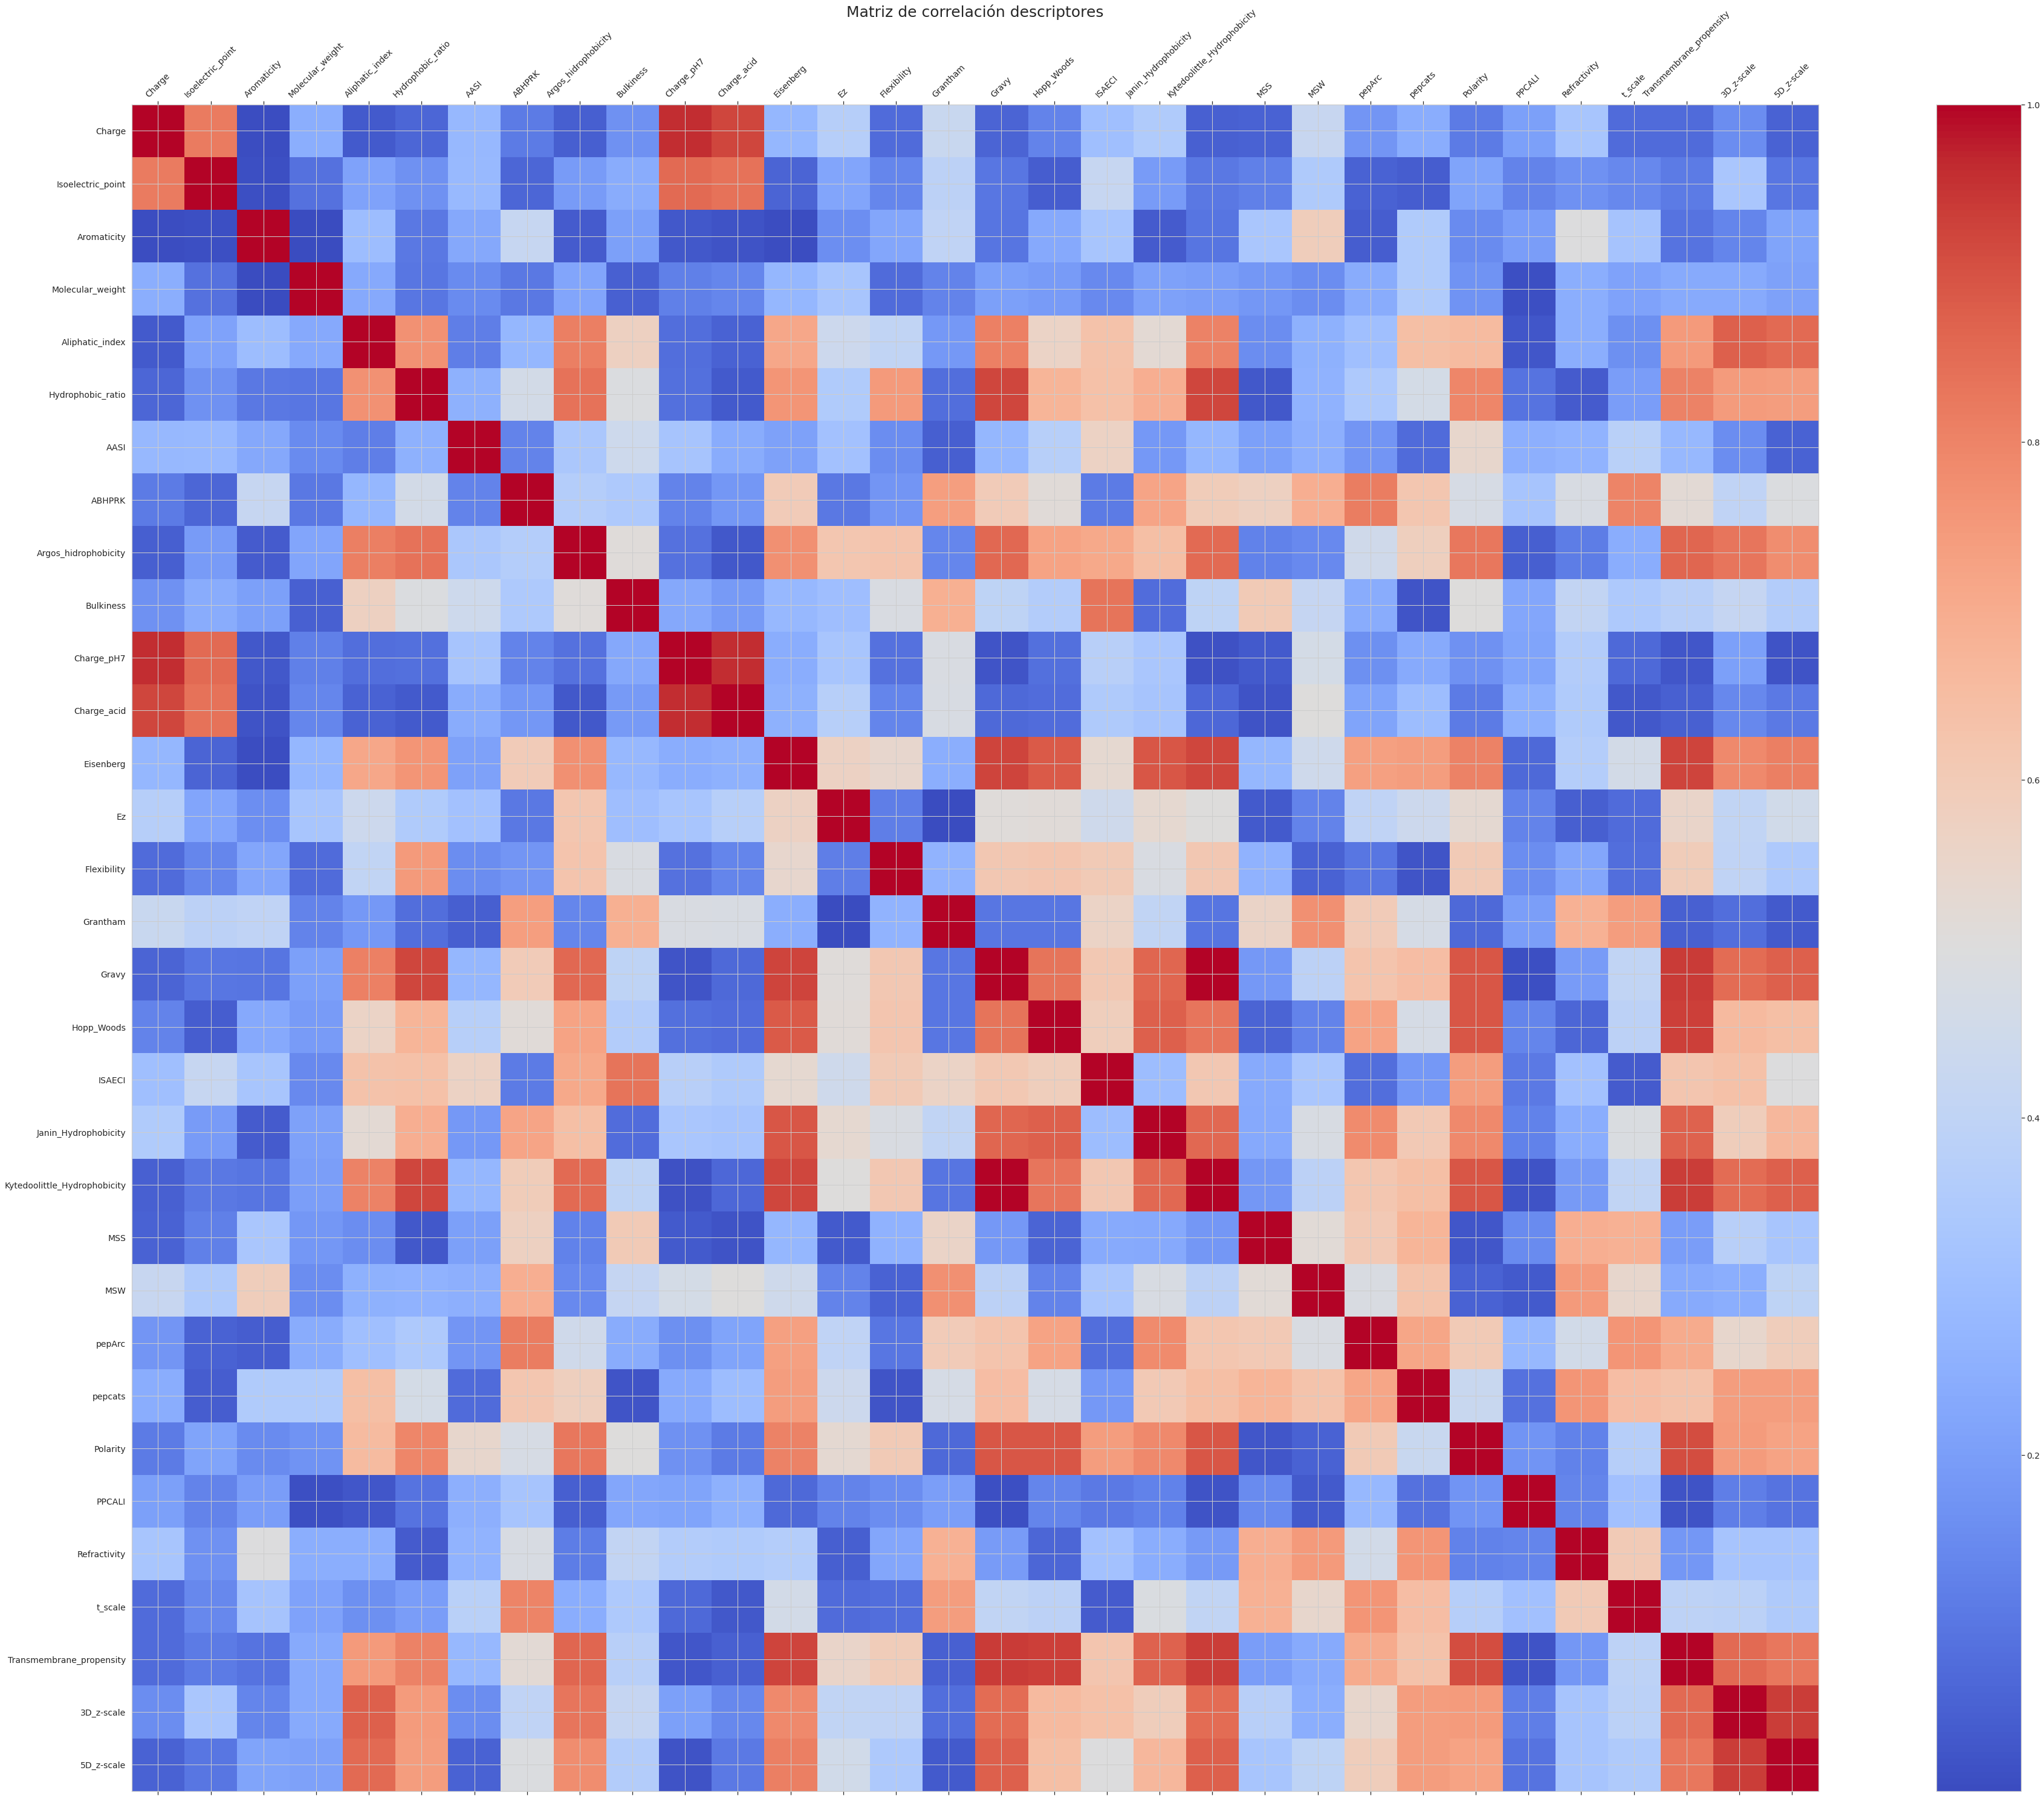

In [261]:
#Matriz de correlación normalizada
f = plt.figure(figsize=(70, 50))
plt.matshow(features_norm.corr().abs(), fignum=f.number, cmap=plt.get_cmap('coolwarm'))
plt.xticks(range(features_norm.select_dtypes(['number']).shape[1]), features_norm.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(features_norm.select_dtypes(['number']).shape[1]), features_norm.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matriz de correlación descriptores', fontsize=25);

In [262]:
upper_tri = features_norm.corr().abs().where(np.triu(np.ones(features_norm.corr().abs().shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
features_desc = features_norm.drop(to_drop, axis=1)

In [263]:
# Load dataset
X = features_desc
y = pepdesc_total['class'].copy()

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:07<00:00,  4.05it/s]


In [266]:
# Prints the model performance (Training set)
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
NuSVC,0.76,0.76,0.76,0.76,0.53,0.47
SVC,0.75,0.75,0.75,0.75,0.50,0.40
KNeighborsClassifier,0.73,0.74,0.74,0.73,0.47,0.08
LinearSVC,0.71,0.71,0.71,0.71,0.43,0.30
XGBClassifier,0.71,0.71,0.71,0.71,0.43,0.46
LinearDiscriminantAnalysis,0.71,0.71,0.71,0.71,0.42,0.04
RidgeClassifierCV,0.71,0.71,0.71,0.71,0.42,0.03
RidgeClassifier,0.71,0.71,0.71,0.71,0.42,0.02
CalibratedClassifierCV,0.71,0.71,0.71,0.71,0.42,1.18


In [267]:
# Build NuSVC model

from sklearn.svm import NuSVC


clf = NuSVC(gamma='scale')
clf.fit(X_train, y_train)

NuSVC()

In [268]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [269]:
feature_aac['class']

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
1417    negative
1418    negative
1419    negative
1420    negative
1421    negative
Name: class, Length: 2759, dtype: object

In [270]:
# Simplest and quickest way to obtain the model performance (Accuracy)
clf.score(X_test,y_test)

0.7681159420289855

In [271]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.7681159420289855

In [272]:
# Matthew Correlation Coefficient
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_test_pred)

0.5429507726082975

In [273]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[202,  83],
       [ 45, 222]])

In [274]:
# Classification report
from sklearn.metrics import classification_report

model_report = classification_report(y_train, y_train_pred, target_names=['positive','negative'])

f = open('model_report.txt','w')
f.writelines(model_report) 
f.close()

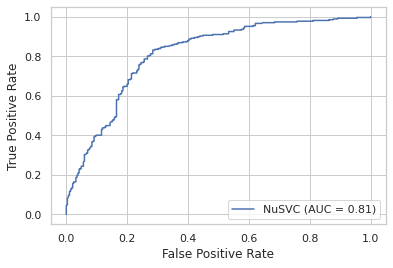

In [275]:
# ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf, X_test, y_test)  
plt.show()

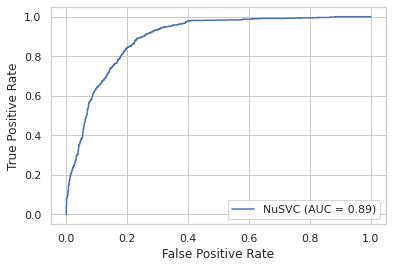

In [276]:
plot_roc_curve(clf, X_train, y_train)  
plt.show()

---